In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("diminos_data.csv")

print(df.head())
print(df.info())


   order_id      order_placed_at          order_delivered_at
0   1523111  2023-03-01 00:00:59  2023-03-01 00:18:07.443132
1   1523112  2023-03-01 00:03:59  2023-03-01 00:19:34.925241
2   1523113  2023-03-01 00:07:22  2023-03-01 00:22:28.291385
3   1523114  2023-03-01 00:07:47  2023-03-01 00:46:19.019399
4   1523115  2023-03-01 00:09:03  2023-03-01 00:25:13.619056
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB
None


In [11]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

df['delivery_minutes'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds() / 60

In [12]:
print(df['delivery_minutes'].describe())


count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_minutes, dtype: float64


In [13]:
p95 = np.percentile(df['delivery_minutes'], 95)

print(f"95th Percentile Delivery Time: {p95:.2f} minutes")

if p95 < 31:
    print("✅ SLA MET: Store performance is within Diminos requirements.")
else:
    print("❌ SLA VIOLATED: Risk of losing franchise!")


95th Percentile Delivery Time: 27.26 minutes
✅ SLA MET: Store performance is within Diminos requirements.


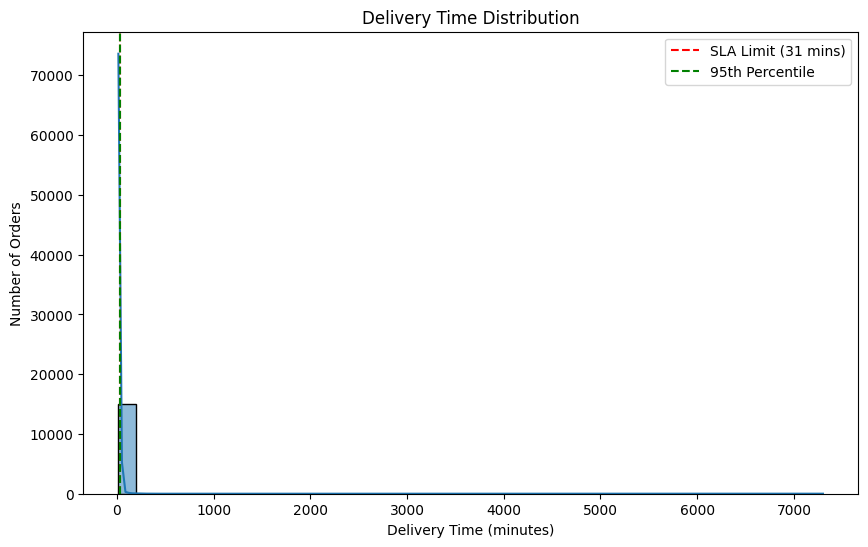

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df['delivery_minutes'], bins=40, kde=True)
plt.axvline(31, color='red', linestyle='--', label='SLA Limit (31 mins)')
plt.axvline(p95, color='green', linestyle='--', label='95th Percentile')
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Number of Orders")
plt.legend()
plt.show()


In [15]:
df['order_hour'] = df['order_placed_at'].dt.hour

hourly_stats = df.groupby('order_hour')['delivery_minutes'].agg(['mean', 'count', lambda x: np.percentile(x, 95)])
hourly_stats.columns = ['avg_delivery', 'orders', 'p95_delivery']

print(hourly_stats)

            avg_delivery  orders  p95_delivery
order_hour                                    
0              24.116781     621     28.866990
1              20.836201     610     32.104821
2              19.123197     610     26.845717
3              19.846034     629     25.617373
4              18.818769     633     26.259762
5              17.727910     641     23.924907
6              18.501060     658     26.493076
7              18.368406     559     27.154475
8              19.264601     603     27.207707
9              33.320277     634     25.709020
10             21.014310     627     26.759252
11             25.908233     655     33.407016
12             19.731810     625     24.327900
13             18.403554     622     29.714826
14             18.999574     631     27.891228
15             17.619334     602     24.933851
16             18.711819     597     32.438371
17             30.352864     617     28.260021
18             17.758926     636     24.104592
19           

In [16]:
late_orders = df[df['delivery_minutes'] > 31]

late_percentage = (len(late_orders) / len(df)) * 100
print(f"Late Orders (>31 min): {late_percentage:.2f}%")


Late Orders (>31 min): 3.71%
